In [60]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [4]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],stratify=cancer['target'],random_state=42)

### Training without pre-pruning

In [5]:
tree=DecisionTreeClassifier(random_state=66)
tree.fit(X_train,y_train)
print("Accuracy on the training dataset {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on the test dataset {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on the training dataset 1.000
Accuracy on the test dataset 0.923


### Limiting the max depth so as to prevent pure leaves 

In [6]:
tree=DecisionTreeClassifier(max_depth=4,random_state=66)
tree.fit(X_train,y_train)
print("Accuracy on the training dataset {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on the test dataset {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on the training dataset 0.986
Accuracy on the test dataset 0.916


### Visualizing the tree

In [7]:
export_graphviz(tree,out_file='tree.dot',class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

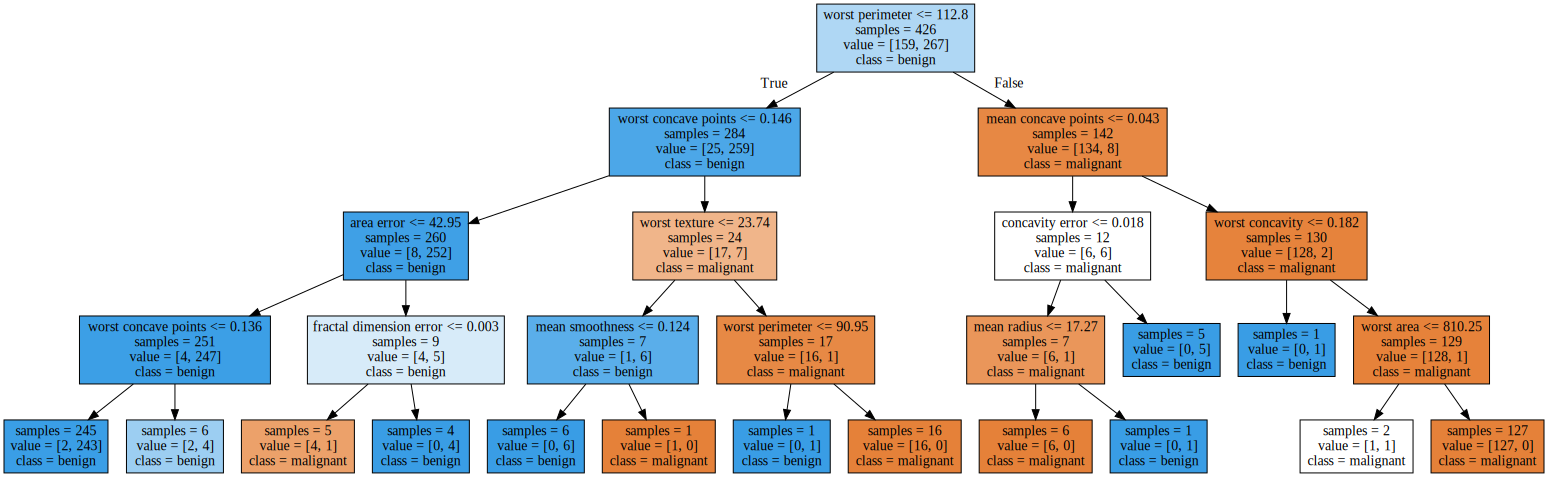

In [8]:
## Make it work
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance

In [9]:
tree.feature_importances_

array([0.00901896, 0.        , 0.        , 0.        , 0.00901896,
       0.        , 0.        , 0.02714774, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01678666, 0.        ,
       0.        , 0.02254739, 0.        , 0.        , 0.01496479,
       0.        , 0.03325003, 0.73915246, 0.00517949, 0.        ,
       0.        , 0.01027992, 0.1126536 , 0.        , 0.        ])

Text(0.5, 0, 'Feature Importance')

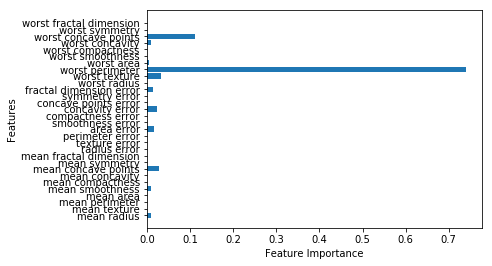

In [10]:
n_features=cancer['data'].shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.ylabel("Features")
plt.xlabel("Feature Importance")

The most important feature can be seen is worst perimeter and worst concave points.Also the relation between a feature and the class is not monotonous.

In [21]:
price=pd.read_csv("ram_price.csv")
price.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [22]:
price.drop(['Unnamed: 0'],axis=1,inplace=True)
price.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


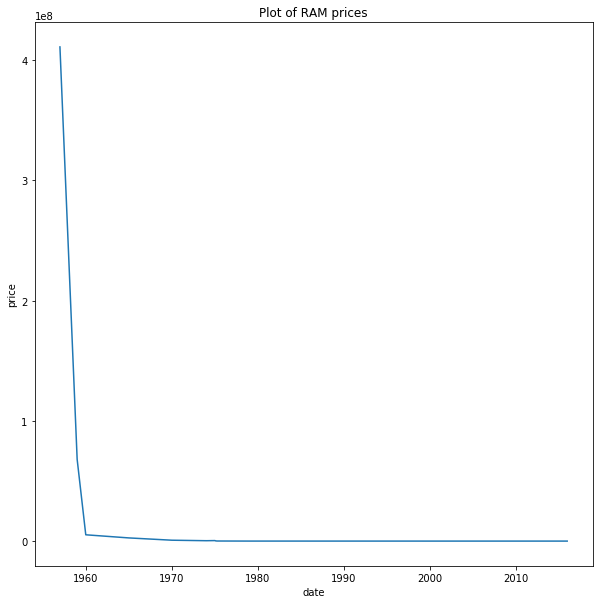

In [34]:
plt.figure(figsize=(10,10))
plt.plot(price['date'],price['price'])
plt.xlabel('date')
plt.ylabel('price')
plt.title("Plot of RAM prices")
plt.show()

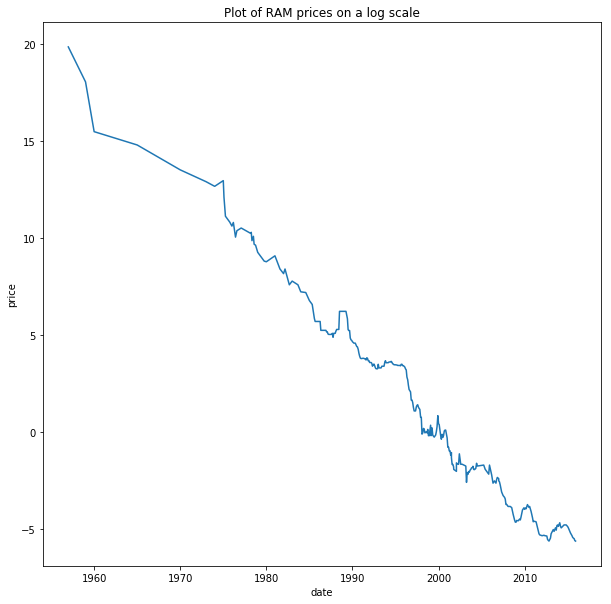

In [35]:
plt.figure(figsize=(10,10))
plt.plot(price['date'],np.log(price['price']))
plt.xlabel('date')
plt.ylabel('price')
plt.title("Plot of RAM prices on a log scale")
plt.show()

In [37]:
price.shape

(333, 2)

In [39]:
train=price.iloc[:250,:]
test=price.iloc[250:,:]

In [46]:
X_train=train['date'].values.reshape(-1,1)
y_train=np.log(train['price'])

In [47]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
X_test=test['date'].values.reshape(-1,1)
y_test=np.log(test['price'])

In [51]:
tree_pred=np.exp(tree.predict(X_test))
tree_pred2=np.exp(tree.predict(X_train))

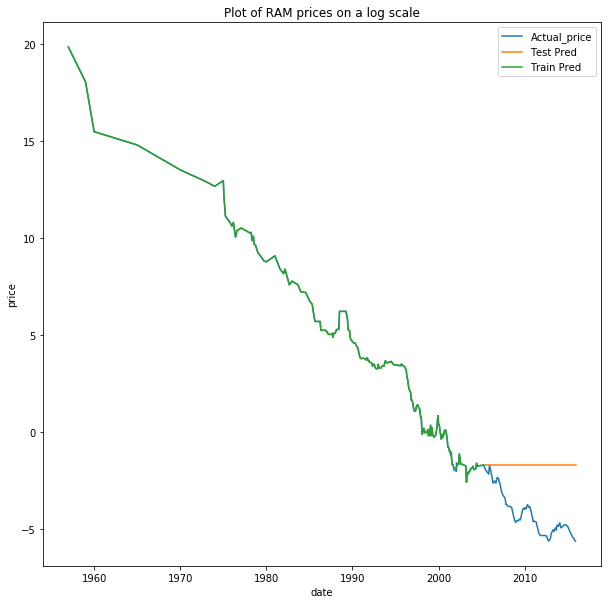

In [53]:
plt.figure(figsize=(10,10))
plt.plot(price['date'],np.log(price['price']),label='Actual_price')
plt.plot(test['date'],np.log(tree_pred),label='Test Pred')
plt.plot(train['date'],np.log(tree_pred2),label='Train Pred')
plt.xlabel('date')
plt.ylabel('price')
plt.title("Plot of RAM prices on a log scale")
plt.legend()
plt.show()

As seen from the graph the tree predicts with hundred percent accuracy on the training dataset. But it perfroms poorly on the test dataset because the algorithm can't extrapolate and chooses the minimum value it has encountered in the training dataset.

## Ensemble

### Random Forest

In [54]:
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],stratify=cancer['target'],random_state=42)

In [57]:
tree=RandomForestClassifier(n_estimators=200,random_state=66)
tree.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=66, verbose=0, warm_start=False)

In [58]:
print("Accuracy on the training dataset {}".format(tree.score(X_train,y_train)))
print("Accuracy on the test dataset {}".format(tree.score(X_test,y_test)))

Accuracy on the training dataset 1.0
Accuracy on the test dataset 0.958041958041958


Text(0.5, 0, 'Feature Importance')

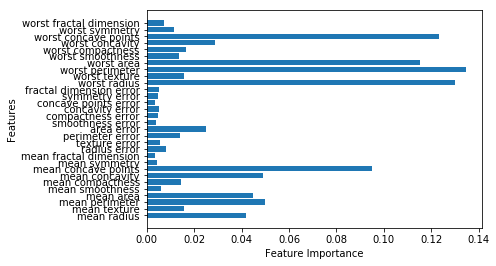

In [59]:
n_features=cancer['data'].shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.ylabel("Features")
plt.xlabel("Feature Importance")

Unlike a single decision tree this model gives importance to more features like worst area and worst perimeter.Different trees in random forest gives different splits and give a clearer feature importance. 

### Gradient Boosting Regressor

In [70]:
tree=GradientBoostingClassifier(n_estimators=200,random_state=66,learning_rate=0.01)
tree.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=66, subsample=1.0, verbose=0,
              warm_start=False)

In [71]:
print("Accuracy on the training dataset {}".format(tree.score(X_train,y_train)))
print("Accuracy on the test dataset {}".format(tree.score(X_test,y_test)))

Accuracy on the training dataset 0.9929577464788732
Accuracy on the test dataset 0.9370629370629371


Text(0.5, 0, 'Feature Importance')

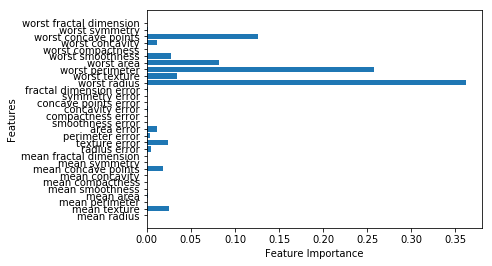

In [73]:
n_features=cancer['data'].shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.ylabel("Features")
plt.xlabel("Feature Importance")

Gradient Boosting directly sets some of feature importances to zero.